 # PROYECTO INTEGRADO 1 - Tienda Online "ICE"

1. INTRODUCCIÓN 

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.


1.1 DESCRIPCIÓN DE LOS DATOS 

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

2.0 INICIALIZACIÓN

In [1]:
# Carga todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga los archivos de datos en diferentes Data Frames
games_df = pd.read_csv('/datasets/games.csv', ',')

In [3]:
# Imprime la información general/resumida sobre el DataFrame de los juegos
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Imprime una muestra de los datos de los juegos 
games_df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


2.1 PREPARAR LOS DATOS 

In [5]:
# Reemplazar los nombres de las columnas (minúsculas).
games_df.columns = games_df.columns.str.lower().str.replace(' ', '_')
print(games_df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [6]:
# Convertir los datos en los tipos necesarios.

# Se convierte 'year_of_release' a int64
games_df['year_of_release'] = pd.to_numeric(games_df['year_of_release'], errors='coerce').astype('Int64')

# Se confirma que las siguientes columnas tengan formato str 
games_df['name'] = games_df['name'].astype('string')
games_df['platform'] = games_df['platform'].astype('string')
games_df['genre'] = games_df['genre'].astype('string')
games_df['rating'] = games_df['rating'].astype('string')

games_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  string 
 1   platform         16715 non-null  string 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  string 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   string 
dtypes: Int64(1), float64(5), object(1), string(4)
memory usage: 1.4+ MB


In [7]:
# Reemplazar 'tbd' por NaN
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)

# Convertir a float
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  string 
 1   platform         16715 non-null  string 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  string 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   string 
dtypes: Int64(1), float64(6), string(4)
memory usage: 1.4 MB


Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

Cambiamos 'year_of_release' a int64, significa "año de lanzamiento" entonces podriamos usar este dato en nuestro analisis para saber el promedio de en que año fueron lanzados más juegos o diferencia de año de lanzamiento entre el juego con mejor puntuación y menor puntuación 

Cambiamos 'user_score' a float ya que la puntuacion del usuario contiene un punto decimal, lo usaremos en el futuro para hacer operaciones matematicas entre las puntuaciones 


In [8]:
# Mostrar los valores ausentes 
games_df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Si es necesario, elige la manera de tratar los valores ausentes: 

'name' y 'genre' tienen solo 2 valores ausentes, pudo ser provocado por mala introducción de la información o simplemente error humano, como sea no podemos analizar los datos ya que no sabemos de que juego se trata, se remienda eliminar esas dos filas

En 'year_of_release' hay 269 datos ausentes, no es un número importante dada la catidad de datos, si en nuestro analisis decidimos hacer agrupamiento por año o por decada, lo mejor seria eliminar los 269 datos. 

Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

'critic_score' y 'user_score' reemplazariamos TBD por NaN ya que NO es recomendable reemplazarlos por 0 ya que afectaria nuestro analisis estadistico cuando usemos esas columnas 

'rating' podriamos reemplazar el valor ausente por "Sin clasificación" ya que no podriamos eliminar esas filas ya que el número es considerable

¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

TBD: significa "to be determined" (a determinar) - lo podriamos clasificar como juego aún sin puntuar, podria ser que el usuario no ha terminado el juego para poder brindar una puntuación justa. 

In [9]:
# Eliminamos los NaN de las siguientes columnas 
games_df = games_df.dropna(subset=['name', 'genre'])

# Eliminamos los NaN del año de lanzamiento 
games_df = games_df.dropna(subset=['year_of_release'])

In [10]:
# Reemplazamos TBD por NaN en 'critic_score' y 'user_score'
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)
games_df['critic_score'] = games_df['critic_score'].replace('tbd', np.nan)

# Reemplazamos NaN por "Sin clasificación" en 'rating'
games_df['rating'] = games_df['rating'].fillna('Sin clasificación')

In [11]:
# Confirmamos cambios 
games_df.info()
games_df.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  string 
 1   platform         16444 non-null  string 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  string 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  string 
dtypes: Int64(1), float64(6), string(4)
memory usage: 1.5 MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Sin clasificación
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Sin clasificación
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Sin clasificación
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Sin clasificación


In [12]:
# Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.
games_df['total_sales'] = (
    games_df['na_sales'] +
    games_df['eu_sales'] +
    games_df['jp_sales'] +
    games_df['other_sales']
)

games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Sin clasificación,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Sin clasificación,31.38


3.0 ANALIZA LOS DATOS 

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [13]:
# Contamos juegos por año 
games_per_year = games_df['year_of_release'].value_counts().sort_index()
print(games_per_year)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


In [14]:
# Contamos juegos por decada 
games_per_decade = (games_df['year_of_release'] // 10) * 10
games_per_decade = games_per_decade.value_counts().sort_index()

print(games_per_decade)

1980     205
1990    1769
2000    9193
2010    5277
Name: year_of_release, dtype: Int64


Agrupandolos por decada logramos ver cuantos juegos fueron lanzados y que diferencia hubo en cada decada. El por que de la diferencia puede ser x numero de razones que no analizaremos todavia 

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer? 

In [15]:
# Calculamos las ventas totales por plataforma
sales_per_platform = games_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()

# Ordenar las plataformas por ventas totales
sales_per_platform = sales_per_platform.sort_values(by='total_sales', ascending=False)

# Mostrar las primeras plataformas con más ventas
sales_per_platform.head(20)

#Trabajaremos con las 10 plataformas mas populares 
top_10 = sales_per_platform.head(10)
print(top_10)

          na_sales  eu_sales  jp_sales  other_sales  total_sales
platform                                                        
PS2         572.92    332.63    137.54       190.47      1233.56
X360        595.74    268.32     12.30        84.88       961.24
PS3         390.13    327.21     79.41       134.59       931.34
Wii         486.87    258.32     68.28        77.71       891.18
DS          380.31    188.41    175.02        59.04       802.78
PS          334.72    212.39    139.78        40.69       727.58
PS4         108.74    141.09     15.96        48.35       314.14
GBA         184.12     74.59     46.56         7.61       312.88
PSP         107.27     65.62     75.88        40.76       289.53
3DS          82.65     61.27    100.62        13.27       257.81


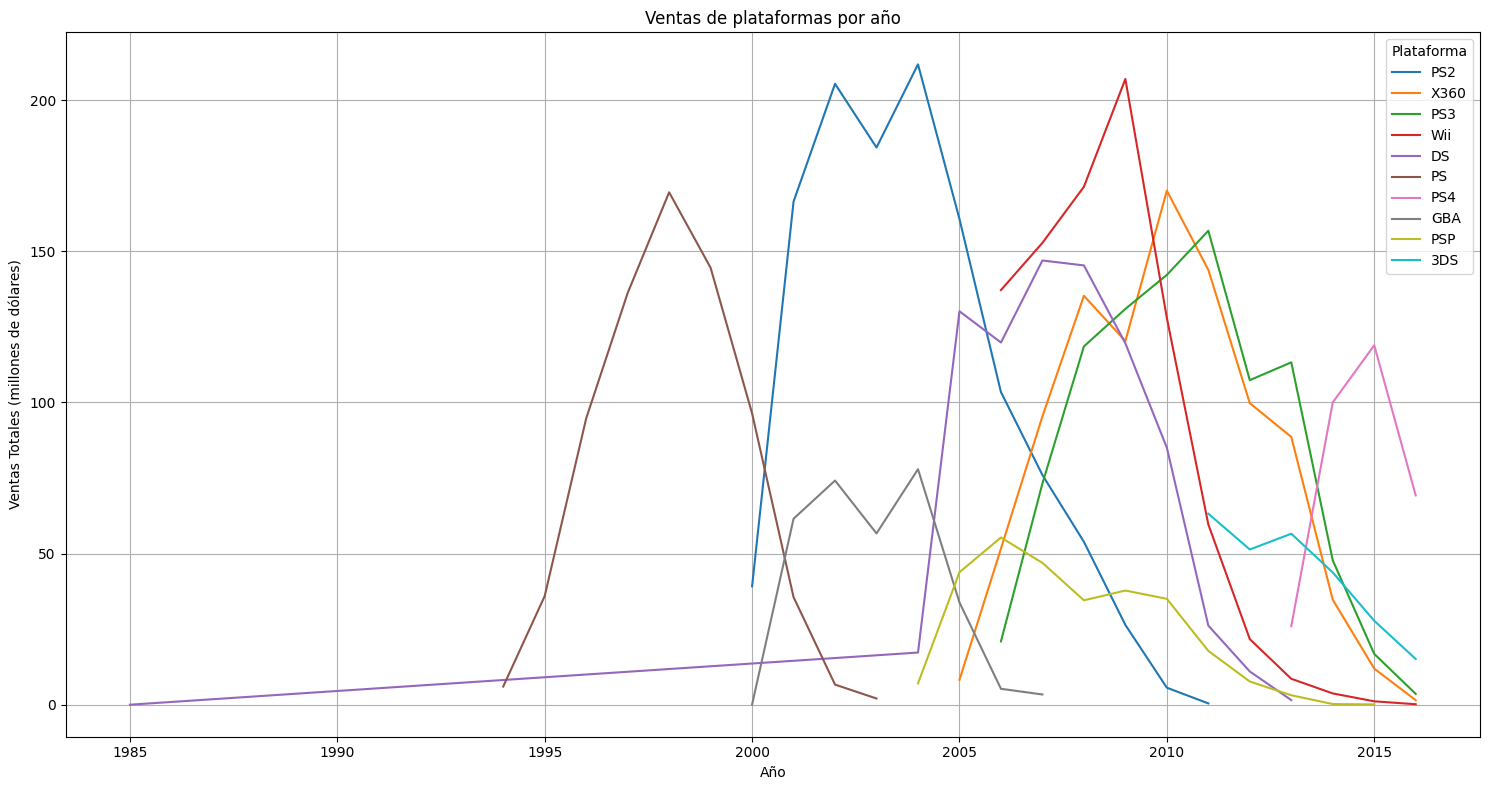

In [16]:
# Distribución de ventas por año para el Top 10
selected_platforms = top_10.index

# Filtramos el DataFrame para las plataformas seleccionadas 
filtered_df = games_df[games_df['platform'].isin(selected_platforms)]

# Sales per year per plataform 
sales_per_yp = filtered_df.groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum().reset_index()

plt.figure(figsize=(15, 8))
for platform in selected_platforms:
    platform_data = sales_per_yp[sales_per_yp['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

plt.title('Ventas de plataformas por año')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (millones de dólares)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Identificar plataformas que dejaron de tener ventas
missing_platforms = sales_per_yp.groupby('platform').last(5)
missing_platforms = missing_platforms[missing_platforms['total_sales'] == 0]

# Mostrar plataformas que desaparecieron
print(missing_platforms)

Empty DataFrame
Columns: [year_of_release, na_sales, eu_sales, jp_sales, other_sales, total_sales]
Index: []


Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

El periodo que podemos usar es de 2010 a 2016 son seis años de datos donde se asemejam diferentes componentes, numero de usuarios, incluye auge de diferentes y nuevas plataformas 

In [18]:
df_model = games_df[(games_df['year_of_release'] >= 2010) & (games_df['year_of_release'] <= 2016)]
print(df_model)

                                 name platform  year_of_release         genre  \
14                 Kinect Adventures!     X360             2010          Misc   
16                 Grand Theft Auto V      PS3             2013        Action   
23                 Grand Theft Auto V     X360             2013        Action   
27        Pokemon Black/Pokemon White       DS             2010  Role-Playing   
29     Call of Duty: Modern Warfare 3     X360             2011       Shooter   
...                               ...      ...              ...           ...   
16703                Strawberry Nauts      PSV             2016     Adventure   
16707                Aiyoku no Eustia      PSV             2014          Misc   
16710   Samurai Warriors: Sanada Maru      PS3             2016        Action   
16712         Haitaka no Psychedelica      PSV             2016     Adventure   
16714             Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [19]:
# Agrupamos plataformas lideres en total_sales
platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales.head(10))

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


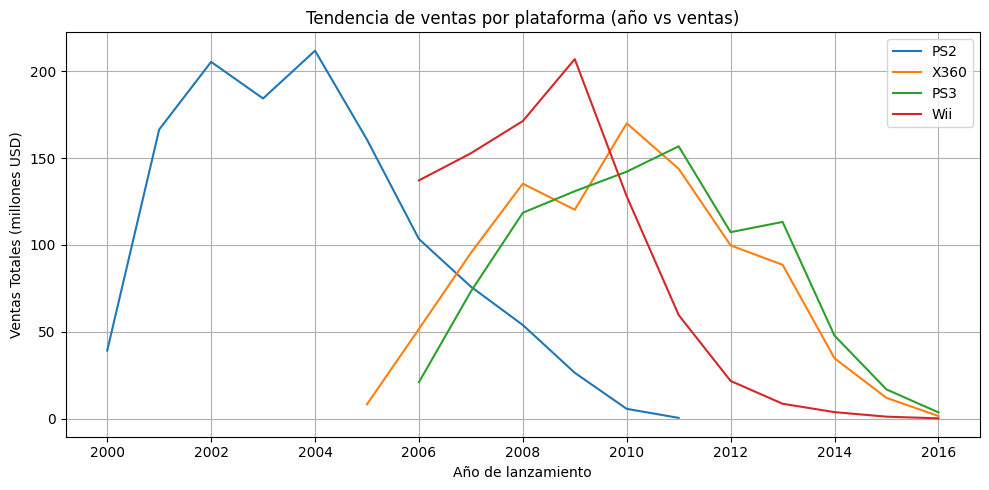

In [20]:
# ¿Cuáles son las plataformas que crecen y cuáles se reducen? 
annual_sales = games_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

top_4 = platform_sales.head(4).index

plt.figure(figsize=(10, 5))
for platform in top_4:
    datos = annual_sales[annual_sales['platform'] == platform]
    plt.plot(datos['year_of_release'], datos['total_sales'], label=platform)

plt.title('Tendencia de ventas por plataforma (año vs ventas)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas Totales (millones USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
sales_per_yp = games_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack(fill_value=0)
ultimos_años = sales_per_yp.loc[:, 2010:2016]
plataformas_sin_ventas = ultimos_años.sum(axis=1).sort_values()
print(plataformas_sin_ventas.head(10))

platform
2600    0.0
WS      0.0
TG16    0.0
SNES    0.0
SCD     0.0
SAT     0.0
XB      0.0
PCFX    0.0
NG      0.0
NES     0.0
dtype: float64


Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.


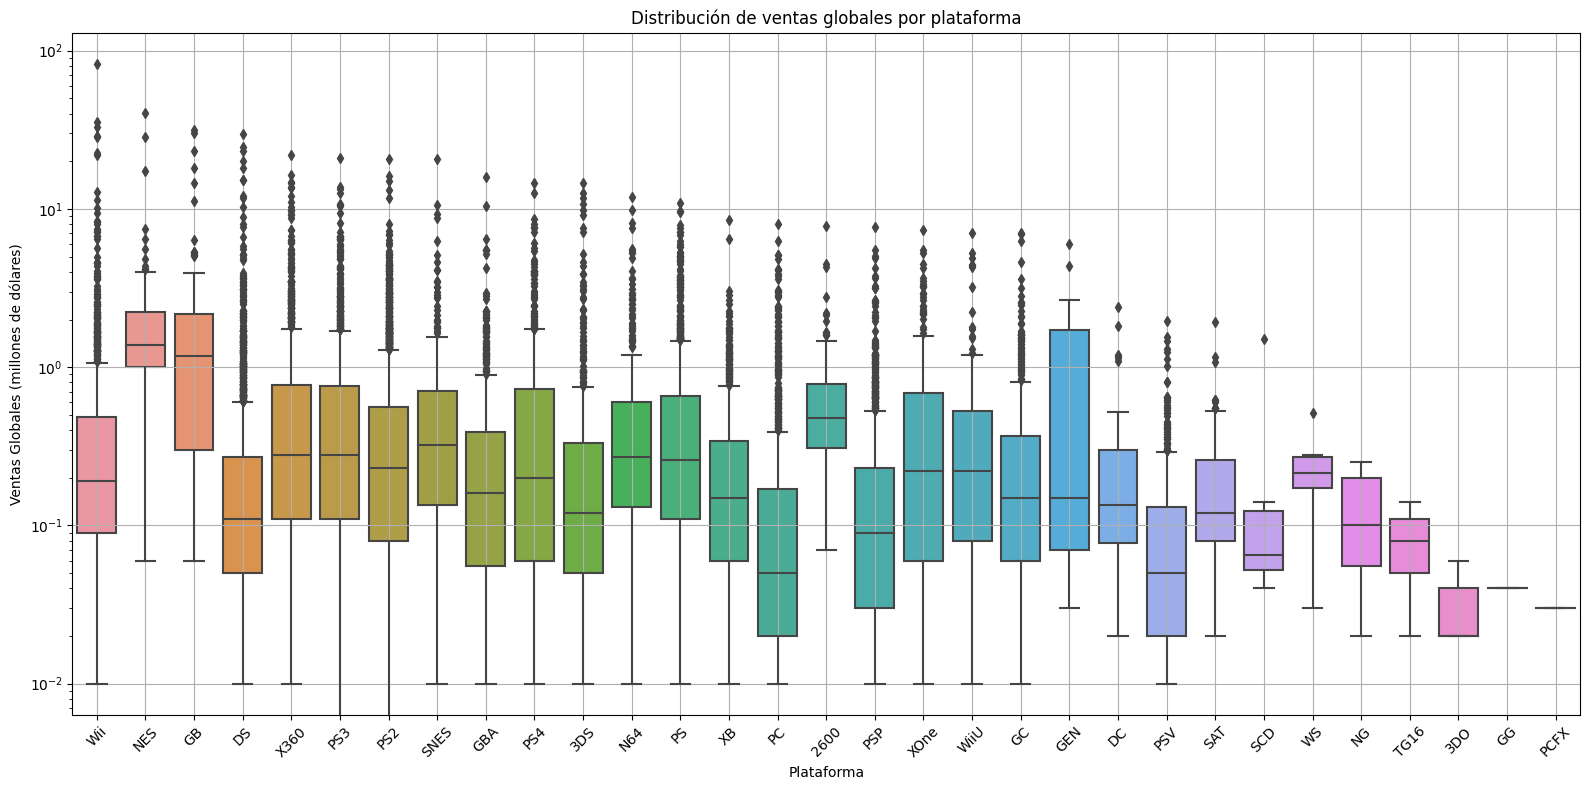

In [22]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='platform', y='total_sales', data=games_df)
plt.yscale('log')  
plt.title('Distribución de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones de dólares)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

El diagrama de caja muestra que las diferencias en ventas globales entre plataformas son significativas, algunas plataformas tienen una gran cantidad de juegos con ventas bajas y pocos juegos de "superventas" (lo que explica los altos promedios), otros tienen una distribución más concentrada.

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.


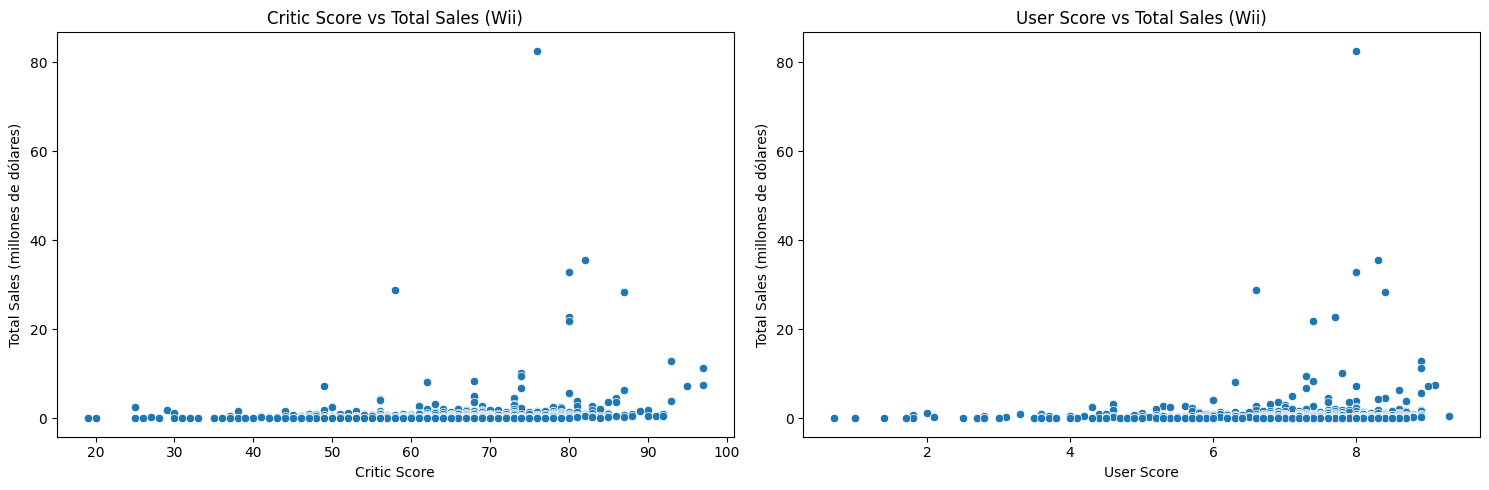

Correlación entre Critic Score y Total Sales: 0.17085459105550813
Correlación entre User Score y Total Sales: 0.11063675382808996


In [23]:
# Filtramos el DataFrame para la plataforma 'Wii'
wii_df = games_df[games_df['platform'] == 'Wii']

# Eliminamos filas con valores ausentes en critic_score, user_score y total_sales
wii_df = wii_df.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Creamos un diagrama de dispersión para "Critic Score" vs "Total Sales"
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=wii_df)
plt.title('Critic Score vs Total Sales (Wii)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millones de dólares)')

# Creamos un diagrama de dispersión para "User Score" vs "Total Sales"
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=wii_df)
plt.title('User Score vs Total Sales (Wii)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millones de dólares)')

plt.tight_layout()
plt.show()

# Calculamos la correlación entre las reseñas y las ventas
corr_critic = wii_df['critic_score'].corr(wii_df['total_sales'])
corr_user = wii_df['user_score'].corr(wii_df['total_sales'])

print("Correlación entre Critic Score y Total Sales:", corr_critic)
print("Correlación entre User Score y Total Sales:", corr_user)

En el gráfico de Critic Score vs Total Sales se puede observar si existe una tendencia de que los juegos con mejores reseñas de críticos tienden a tener mayores ventas.

En el gráfico de User Score vs Total Sales, se evaluará de forma similar si los puntajes de los usuarios están asociados a un mayor rendimiento en ventas.

Gracias a la función corr() podemos sugerir que hay una ligera correlación positiva 

En nuestro breve análisis de la plataforma Wii se observa como las reseñas de criticos y usuarios un ligero grado de correlación positiva con las ventas (calidad influye en el exito en ventas)

Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [24]:
pivot_ventas = games_df.pivot_table(index='name', 
                                    columns='platform', 
                                    values='total_sales', 
                                    aggfunc='sum')
pivot_ventas.head(10)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,,,,,,,
Beyblade Burst,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,NaN,NaN,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen: Olaf's Quest,NaN,NaN,0.59,NaN,0.51,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tales of Xillia 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'98 Koshien,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Vol.1//Rebirth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Vol.2//Reminisce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Vol.2//Reminisce (jp sales),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ya que hay juegos que no fueron lanzados en varias plataformas, seleccionaremos algunos que esten presentes en mas de una plataforma 

In [25]:
# Contaremos en cuántas plataformas aparece cada juego (en este NO contamos NaN)
num_platforms = pivot_ventas.notna().sum(axis=1)

# Filtramos juegos que aparezcan en 2 o más plataformas
games_multiplataform = pivot_ventas[num_platforms >= 2]

games_multiplataform.head(10)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,,,,,,,
Frozen: Olaf's Quest,NaN,NaN,0.59,NaN,0.51,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007: Quantum of Solace,NaN,NaN,NaN,NaN,0.13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.65,NaN,1.48,NaN,NaN
007: The World is not Enough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11eyes: CrossOver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN
18 Wheeler: American Pro Trucker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187: Ride or Die,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN
2 in 1 Combo Pack: Sonic Heroes / Super Monkey Ball Deluxe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11,0.53,NaN
2002 FIFA World Cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19,NaN
2010 FIFA World Cup South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.43,NaN,0.85,NaN,NaN


Haremos una comparación entre tres juegos y sus ventas en cada plataforma 

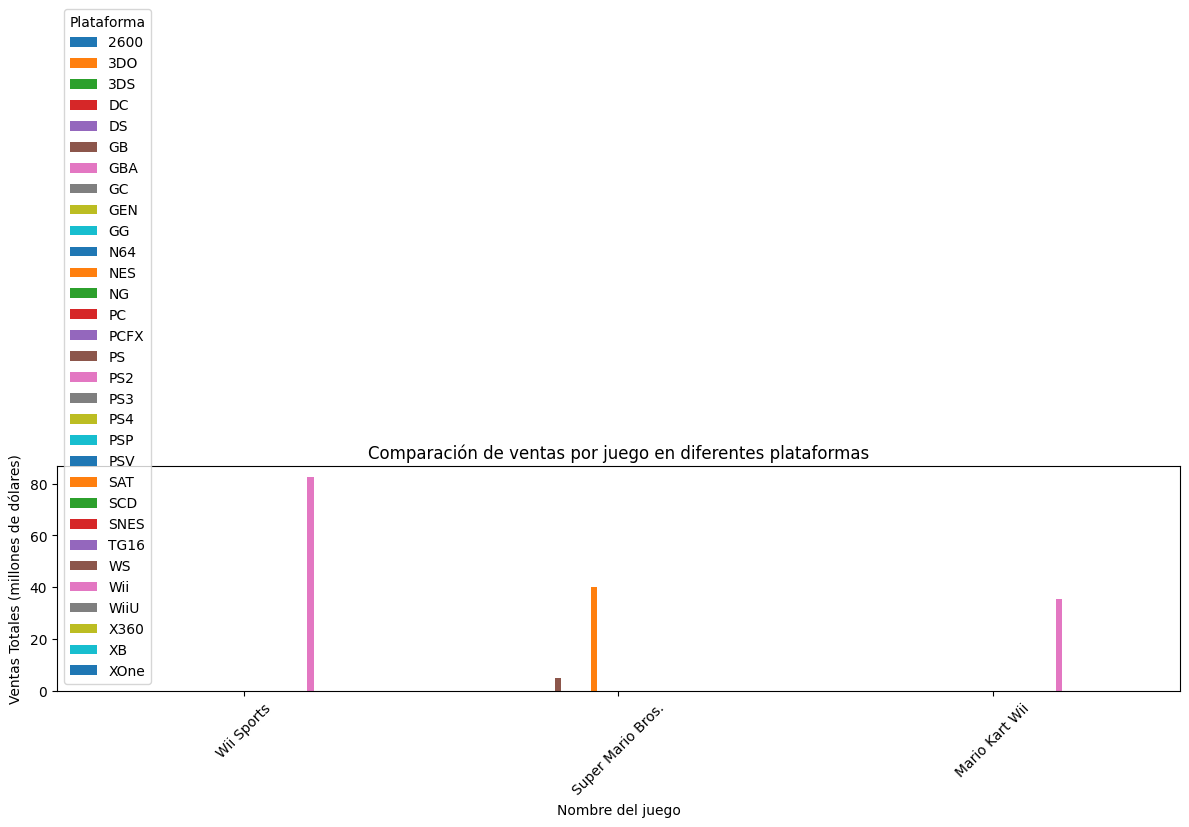

In [26]:
juegos_muestra = ['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii']

# Filtraremos la tabla pivot para esos juegos
pivot_ejemplo = pivot_ventas.loc[juegos_muestra]

pivot_ejemplo.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de ventas por juego en diferentes plataformas')
plt.xlabel('Nombre del juego')
plt.ylabel('Ventas Totales (millones de dólares)')
plt.xticks(rotation=45)
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

En el caso de "Wii Sports" y "Mario Kart Wii" tienen altos valores en la plataforma Wii y valores nulos en las demas plataformas, probablemente porque los juegos no fueron lanzados en otras plataformas lo que sugiere una influencia en las ventas dependiendo para que plataforma el juego es lanzado. 

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [27]:
# Ventas totales por género
genre_total_sales = games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("Ventas totales por género:")
print(genre_total_sales)

# Ventas promedio por juego en cada género
genre_ventas_promedio = games_df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
print("\nVentas promedio por juego por género:")
print(genre_ventas_promedio)

Ventas totales por género:
genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           723.49
Fighting         442.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: total_sales, dtype: float64

Ventas promedio por juego por género:
genre
Platform        0.940262
Shooter         0.803519
Role-Playing    0.628683
Racing          0.590122
Sports          0.567940
Fighting        0.528865
Action          0.519057
Misc            0.459204
Simulation      0.452695
Puzzle          0.421599
Strategy        0.256419
Adventure       0.180456
Name: total_sales, dtype: float64


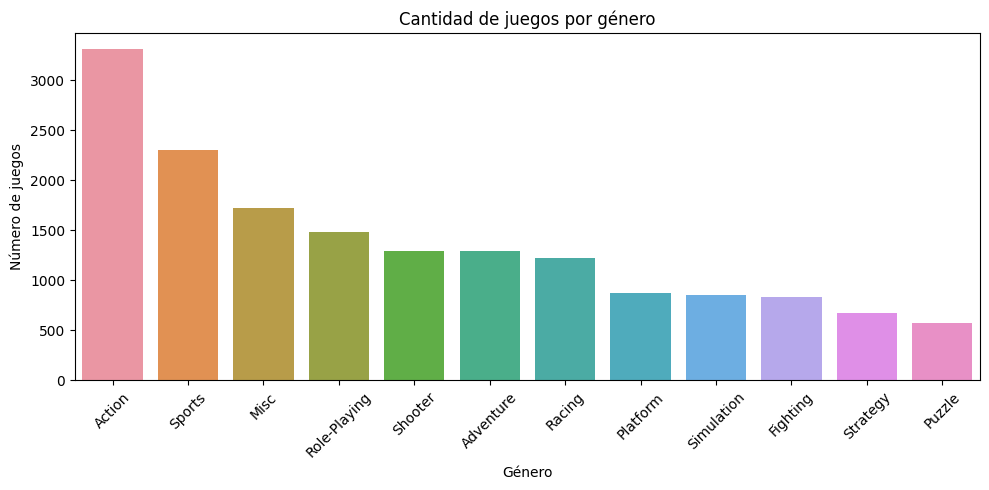

In [28]:
games_per_genre = games_df['genre'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=games_per_genre.index, y=games_per_genre.values)
plt.title('Cantidad de juegos por género')
plt.xlabel('Género')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4.0 CREA UN PERFIL DE USUARIO PARA CADA REGIÓN 

REGIÓN NA - NORTEAMÉRICA

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [29]:
# Ventas totales por plataforma
sales_na = games_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

top5_na = sales_na.head(5)

print("Top 5 plataformas en Norteamérica:")
print(top5_na)

Top 5 plataformas en Norteamérica:
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64


In [30]:
# Ventas totales globales para cada región
total_na = games_df['na_sales'].sum()

# Calculamos la cuota de mercado para las top 5 platforms
cuota_na = (top5_na / total_na) * 100

print("Cuota de mercado en Norteamérica:")
print(cuota_na.round(2))

Cuota de mercado en Norteamérica:
platform
X360    13.72
PS2     13.20
Wii     11.21
PS3      8.99
DS       8.76
Name: na_sales, dtype: float64


Las cinco principales plataformas sugieren un amplio mercado para los fabricantes, cada una de las plataformas es de diferente fabricante (excepto por PS2 y PS3), por lo tanto hay usuarios bien distribuidos en las distintas plataformas

Los cinco géneros principales. Explica la diferencia.

In [31]:
top5_genres_na = games_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 géneros en Norteamérica (NA):")
print(top5_genres_na)

Top 5 géneros en Norteamérica (NA):
genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64


Sports, Action o Shooter encabezan las ventas en NA. Esto podría deberse a la gran popularidad de franquicias deportivas y de acción en este mercado.

REGION UE - EUROPA

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [32]:
# Ventas totales por plataforma 
sales_ue = games_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

top5_ue = sales_ue.head(5)

print("Top 5 plataformas en Europa:")
print(top5_ue)

Top 5 plataformas en Europa:
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64


In [33]:
# Ventas totales globales
total_ue = games_df['eu_sales'].sum()

# Calculamos la cuota de mercado para las top 5 platforms
cuota_ue = (top5_ue / total_ue) * 100

print("Cuota de mercado en Europa:")
print(cuota_ue.round(2))

Cuota de mercado en Europa:
platform
PS2     13.86
PS3     13.64
X360    11.18
Wii     10.76
PS       8.85
Name: eu_sales, dtype: float64


La distribución se demuestra un póco más equilibrada lo que sugiere que no hay una plataforma que domine al mercado 

Los cinco géneros principales. Explica la diferencia.

In [34]:
top5_genres_ue = games_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 géneros en Europa (UE):")
print(top5_genres_ue)

Top 5 géneros en Europa (UE):
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64


En Europa, podemos ver géneros similares a los de NA, pero también pueden aparecer géneros como Racing, en donde la percepción y distribución de títulos es algo distinta debido a las variaciones culturales y de consumo regional.

REGIÓN JP - JAPÓN 

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [35]:
# Ventas totales por plataforma
sales_jp = games_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

top5_jp = sales_jp.head(5)

print("Top 5 plataformas en Japón:")
print(top5_jp)

Top 5 plataformas en Japón:
platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


In [36]:
# Ventas totales globales
total_jp = games_df['jp_sales'].sum()

# Calculamos la cuota de mercado para las top 5 platforms
cuota_jp = (top5_jp / total_jp) * 100

print("Cuota de mercado en Japón:")
print(cuota_jp.round(2))

Cuota de mercado en Japón:
platform
DS      13.56
PS      10.83
PS2     10.66
SNES     9.03
3DS      7.80
Name: jp_sales, dtype: float64


Es común que las consolas japonesas como DS o PSP (y en ocasiones ciertas consolas de marcas locales) tengan una cuota de mercado mucho más alta.
La lista en JP puede ser bastante diferente a la de NA y UE, reflejando las diferencias culturales y la preferencia por ciertos géneros o fabricantes locales.

Los cinco géneros principales. Explica la diferencia.

In [37]:
top5_genres_jp = games_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 géneros en Japón (JP):")
print(top5_genres_jp)

Top 5 géneros en Japón (JP):
genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


El mercado japonés muestra preferencia por géneros como Role-Playing (RPG) y Platform, y en ocasiones otros géneros menos populares en NA o UE se vuelven estrellas en este territorio. 

Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [38]:
# Calculamos la venta promedio por clasificación en cada región
sales_per_rating = games_df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].mean()
print("Ventas promedio por rating en cada región:")
print(sales_per_rating)

Ventas promedio por rating en cada región:
                   na_sales  eu_sales  jp_sales
rating                                         
AO                 1.260000  0.610000  0.000000
E                  0.324978  0.179513  0.050487
E10+               0.248026  0.131622  0.028859
EC                 0.191250  0.013750  0.000000
K-A                0.853333  0.090000  0.486667
M                  0.483652  0.312500  0.041393
RP                 0.000000  0.030000  0.000000
Sin clasificación  0.183619  0.091320  0.125336
T                  0.257349  0.145194  0.051876


In [39]:
total_sales_per_rating = games_df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
print("Ventas totales por rating en cada región:")
print(total_sales_per_rating)

Ventas totales por rating en cada región:
                   na_sales  eu_sales  jp_sales
rating                                         
AO                     1.26      0.61      0.00
E                   1274.24    703.87    197.96
E10+                 345.50    183.35     40.20
EC                     1.53      0.11      0.00
K-A                    2.56      0.27      1.46
M                    742.89    480.00     63.58
RP                     0.00      0.03      0.00
Sin clasificación   1225.84    609.65    836.74
T                    747.60    421.79    150.70


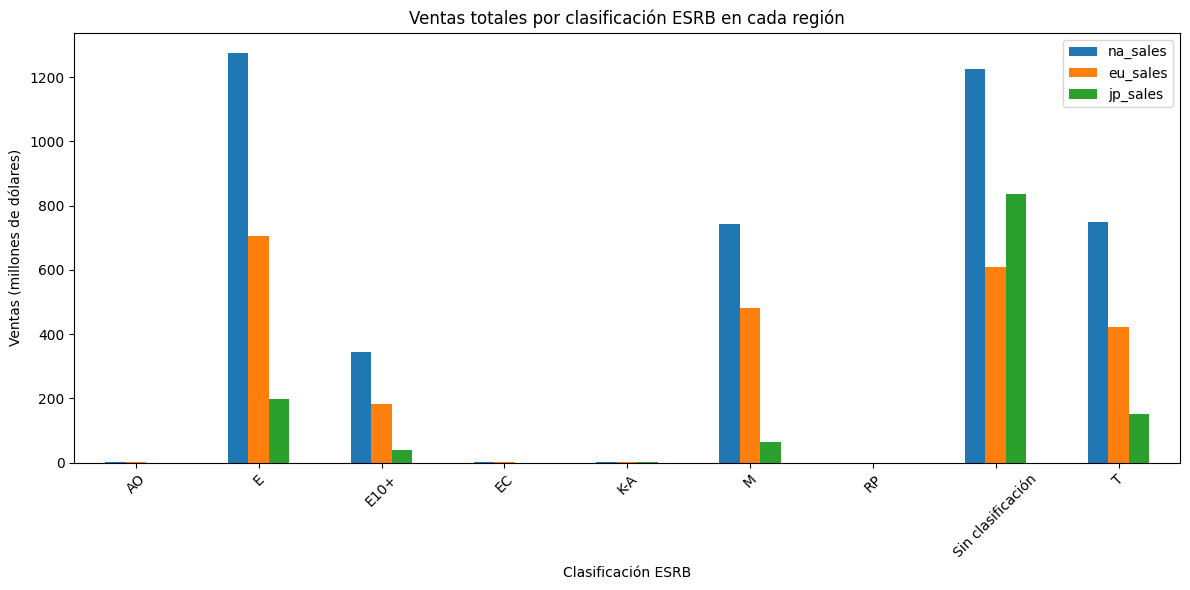

In [40]:
total_sales_per_rating.plot(kind='bar', figsize=(12, 6))
plt.title('Ventas totales por clasificación ESRB en cada región')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones de dólares)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusiones

Los juegos con clasificación E o E10+ muestran consistentemente ventas más elevadas en todas las regiones, esto podría significar que los títulos para todo público atraen a una audiencia más amplia.
Los juegos con clasificaciones M (para adultos) tienen menores ventas promedio en ciertas regiones, lo cual podría explicarse por restricciones de distribución o preferencias culturales.

Los juegos que no tienen clasificación (Sin clasificación) son un número importante pero varian dependiendo de la region, podemos determinar que UE tiene varias regulaciones que no permiten no tener clasificación en los juegos y tambien la región de JP, puede ser por preferencias culturales. NA es la región que tiene más cantidad de juegos sin clasificación 

La clasificación ESRB sí puede afectar las ventas en cada región de forma distinta, siendo un factor relevante a considerar en el estudio de estrategias de mercado y en la segmentación del público

5.0 PRUEBA LAS SIGUIENTES HIPÓTESIS

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

Hipótesis alternativa (H₁): Las calificaciones promedio son diferentes.

In [41]:
# Filtramos plataformas 'Xbox One' y 'PC'
df_comparacion = games_df[games_df['platform'].isin(['XOne', 'PC'])].dropna(subset=['user_score'])

# Extraemos las calificaciones de usuarios (user_score) para cada grupo
calif_xone = df_comparacion[df_comparacion['platform'] == 'XOne']['user_score'].values
calif_pc   = df_comparacion[df_comparacion['platform'] == 'PC']['user_score'].values

# Calculamos la diferencia de medias (Xbox One - PC)
observed_diff = np.mean(calif_xone) - np.mean(calif_pc)
print("Diferencia de medias observada (XOne - PC):", observed_diff)

# Concatenamos datos en un solo vector
all_scores = np.concatenate([calif_xone, calif_pc])

# Definimos el número de permutaciones
n_permutations = 5000
permuted_diffs = np.zeros(n_permutations)

# Tamaños de cada grupo
n_xone = len(calif_xone)

# Realizar las permutaciones
for i in range(n_permutations):
    # Mezclamos aleatoriamente todos los puntajes
    permuted = np.random.permutation(all_scores)
    # Re-asignamos los primeros n_xone como el grupo 1 y el resto como grupo 2
    group1 = permuted[:n_xone]
    group2 = permuted[n_xone:]
    permuted_diffs[i] = np.mean(group1) - np.mean(group2)

# Calculamos el p-valor: la proporción de permutaciones en las cuales la diferencia (valor absoluto)
# es mayor o igual a la diferencia observada
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))
print("P-value obtenido con test de permutación:", p_value)

Diferencia de medias observada (XOne - PC): -0.5445316934720887
P-value obtenido con test de permutación: 0.0002


La diferencia entre las medias -0.5445 nos dice que, en promedio, los juegos XBox One tienen calificaciones aproximadamente de 0.54 inferiores que los juegos en PC 

P-value: 0 sugiere una improbabilidad en obtener una diferencia de medias tan grande bajo la hipostesis nula.

Por lo que rechazamos Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

Aceptamos Hipótesis alternativa (H₁): Las calificaciones promedio son diferentes. Existe diferencia entre las calificaciones promedio de ambas plataformas. Los juegos en PC tienden a tener una calificación más alta que los juegos de XOne 

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para los géneros Action y Sports son iguales.
    
Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para estos dos géneros son diferentes.

In [42]:
# Filtramos por género y eliminamos filas sin datos en 'user_score'
df_action = games_df[games_df['genre'] == 'Action'].dropna(subset=['user_score'])
df_sports = games_df[games_df['genre'] == 'Sports'].dropna(subset=['user_score'])

# Extraemos los puntajes de los usuarios para cada género
ratings_action = df_action['user_score'].values
ratings_sports = df_sports['user_score'].values

# Calculamos la diferencia de medias (por ejemplo, Action - Sports)
obs_diff = np.mean(ratings_action) - np.mean(ratings_sports)
print("Diferencia de medias observada (Action - Sports):", obs_diff)

# Concatenamos ambos grupos en un solo array
all_scores = np.concatenate([ratings_action, ratings_sports])

# Tamaño del grupo de Action
n_action = len(ratings_action)

# Número de permutaciones
n_permutations = 5000
permuted_diffs = np.zeros(n_permutations)

# Realizamos las permutaciones
for i in range(n_permutations):
    # Mezclamos aleatoriamente todos los puntajes
    permuted = np.random.permutation(all_scores)
    # Asignamos los primeros n_action a un grupo y el resto al otro grupo
    group1 = permuted[:n_action]
    group2 = permuted[n_action:]
    permuted_diffs[i] = np.mean(group1) - np.mean(group2)

# Calculamos el p-value: la fracción de permutaciones con diferencia absoluta mayor o igual a la observada
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(obs_diff))
print("P-value obtenido con test de permutación:", p_value)

Diferencia de medias observada (Action - Sports): 0.10669531840723323
P-value obtenido con test de permutación: 0.06


Laa hipotesis nula se mantiene, no se encontro una diferencia significativa entre las calificaciones promedio de los generos Action y Sport 

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

α se estalecio en 0.05 (por lo datos proporcionados en el curso)

Las hipotesis nula y alternativa se establecen a partir del interes de determinar la diferencia entre un genero/plataforma especificpo con otro.

Se empleo in test de permutación, generamos una distribución nula al mezclar aleatoriamente (user_score) entre los dos grupos y calcular la diferencia entre las medias de cada excenario, es util cuando los grupos tienen tamaños diferentes o existe varianza entre ellos. 

6.0 CONLUSIONES GENERALES

Juegos a lo largo del tiempo: La mayor cantidad de lanzamientos fue en la decada de los 00', a partir de 2012 el lanzamiento de juegos se disminuyo lo cual se puede deber a cambios en la insutria como lanzamiento de plataformas digitales.

Las plataformas con mayores ventas globales incluyen PS2, X360, PS3, Wii y DS con un ciclo de vida de entre 6 a 10 años, tras lo cual las ventas decaen significativamente. Algunas plataformas como PS4 y XOne crecían en el período reciente, mientras otras como Wii o DS ya estaban en declive, su popularidad fue breve. 

El efecto de las reseñas, puntajes en los juegos y entre regiones tuvieron una influencia en las ventas, el PS4 demostro demostro una relacion entre los criticos y las ventas. 

Los géneros más rentables globalmente fueron Action, Sports, Shooter y Role-Playing. Puzzle y Strategy fueron menos populares en términos de ventas. Las ventas varían mucho incluso dentro de un mismo género, lo que sugiere que el éxito depende también del juego específico y no solo del genero.

Entre regiones podemos conluir que: 

NA (Norteamérica): Prefiere juegos de Shooter y Sports, y plataformas como X360 y PS4.

EU (Europa): Tiene gustos similares a NA, aunque con mayor diversidad de plataformas exitosas.

JP (Japón): Muy distinto: prefiere Role-Playing y plataformas portátiles como 3DS y PSP. Las ventas de juegos occidentales son más bajas aquí.

La industria de los videojuegos cambia constantemente, con la subida y bajada de popularidad entre las plataformas y tambien la influencia esta en la región (combinada con los gustos culturales de la región). Aunque las calificaciones pueden influir en las ventas, factores como la plataforma, el genero y la región juegan un papel importante. 